In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def transformation(Y):
    l=[]
    n = 0
    for y in Y:
        if y =='TLS':
            n = n+1
            l.append(1)
        else:
            l.append(0)
    print(n)
    return np.array(l)
def count(Y):
    n = 0
    for y in Y:
        if y ==1:
            n = n+1
    print(n)

In [3]:
sample = ["c_4","c_3","c_36"]
X_list = []
y_list = []
Gene = []
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#load data
for i in range(len(sample)):
    #load Y
    path = 'result/'+sample[i]+'_annotation.csv'
    data = pd.read_csv(path)
    c = data.shape[0]
    #load X
    path = "result/"+sample[i]+"_matrix.csv"
    X_data = pd.read_csv(path)
    l_gene = X_data["Unnamed: 0"]
    Gene.append(l_gene)
    #Adjust the barcode for X
    bar = X_data.columns[1:]
    l_bar=[]
    for j in bar:
        j=str(j).replace("X","")
        l_bar.append(j)
    a = X_data.shape[0]
    b = X_data.shape[1]-1
    X_data = np.array(X_data[bar])
    #normalization
    X_scaler = scaler.fit(X_data)                                   
    X_data = X_scaler.transform(X_data)
    #reconstruct X
    X_data = pd.DataFrame(X_data.T, columns = l_gene, index = l_bar)
    #recorde X
    X_list.append(X_data)
    #adjust the barcode for y
    D1 = dict()
    key = []
    for l in range(c):
        x = '-'+str(i)
        key1 = data['Unnamed: 0'][l]
        value1 = data['TLS_2_cat_annot'][l]
        key1 = str(key1).replace('-1','.1')
        key.append(key1)
        D1[key1] = value1
    L1 = list()
    for j in l_bar:
        if j in key:
            tls = D1[j]
        else:
            tls = 'NO_TLS'
        L1.append(tls)
    #transform to 0,1
    y_data = transformation(L1)
    y_data = y_data.ravel()
    #recorde y
    y_list.append(y_data)
    

199
257
255


In [4]:
#identify the genes shared by all the training samples
intersection=[]
for i in range(len(Gene)):
    if i==0:
        intersection=set(Gene[i])
    else:
        intersection=set(intersection).intersection(set(Gene[i]))
intersection=list(intersection)       
#merge the samples to construct the training dataset       
for i in range(len(sample)):
    X_data=X_list[i]
    y_data=y_list[i]
    X_data=X_data[intersection]
    X_data = np.array(X_data).tolist()
    y_data = np.array(y_data).tolist()
    if i==0:
        X = X_data
        y = y_data
    else:
        X = X + X_data
        y = y + y_data

X = pd.DataFrame(X)
X = np.array(X)
y = np.array(y)
X = pd.DataFrame(X,columns = intersection)

In [5]:
X_record =X
y_record = y

In [6]:
X = X_record
y = y_record

/home/xiaoxiaoxier/miniconda3/envs/stlearn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/xiaoxiaoxier/miniconda3/envs/stlearn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


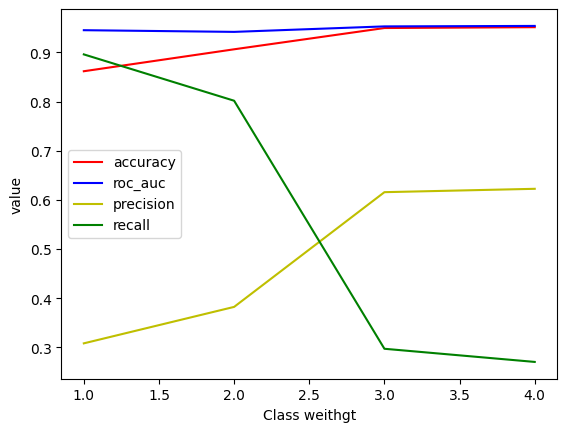

accuracy: 4 0.9512244939819778
roc_auc: 4 0.9538077631071765
precision: 4 0.6225089605734768


In [7]:
#class weight
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
cross = []
l_acc = []
l_roc = []
l_p = []
l_r = []
scoring=["roc_auc","accuracy","precision","recall"]
r = range(1,5)
l = list(r)

for i in l:
    svc = SVC(kernel="linear",probability = True,class_weight = {1:1-i/10,0:i/10})
    cross_score =  cross_validate(svc,X,y,cv=5,scoring=scoring)
    for j in list(cross_score.keys()):
        if j == 'test_accuracy':
            l_acc.append(cross_score[j].mean())
        elif j == 'test_roc_auc':
            l_roc.append(cross_score[j].mean())
        elif j == 'test_precision':
            l_p.append(cross_score[j].mean())
        elif j == 'test_recall':
            l_r.append(cross_score[j].mean())
            
plt.plot(r,l_acc,color='r', label="accuracy")
plt.plot(r,l_roc,color='b', label="roc_auc")
plt.plot(r,l_p,color='y', label="precision")
plt.plot(r,l_r,color='g', label="recall")
plt.xlabel('Class weithgt')
plt.ylabel("value")
plt.legend()
plt.show()


print("accuracy:",l[l_acc.index(max(l_acc))],max(l_acc))
print("roc_auc:",l[(l_roc.index(max(l_roc)))],max(l_roc))
print("precision:",l[(l_p.index(max(l_p)))],max(l_p))

In [8]:
X = X_record
y = y_record

In [ ]:
#C
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
cross = []
l_acc = []
l_roc = []
l_p = []
l_r = []
scoring=["roc_auc","accuracy","precision","recall"]
r = range(0,4)
l = list(r)

for i in l:
    svc = SVC(kernel="linear",C=10**i,probability = True,class_weight = {1:0.8,0:0.2})
    cross_score =  cross_validate(svc,X,y,cv=5,scoring=scoring)
    for j in list(cross_score.keys()):
        if j == 'test_accuracy':
            l_acc.append(cross_score[j].mean())
        elif j == 'test_roc_auc':
            l_roc.append(cross_score[j].mean())
        elif j == 'test_precision':
            l_p.append(cross_score[j].mean())
        elif j == 'test_recall':
            l_r.append(cross_score[j].mean())
            
plt.plot(r,l_acc,color='r', label="accuracy")
plt.plot(r,l_roc,color='b', label="roc_auc")
plt.plot(r,l_p,color='y', label="precision")
plt.plot(r,l_r,color='g', label="recall")
plt.xlabel('C')
plt.ylabel("value")
plt.legend()
plt.show()

print("accuracy:",l[l_acc.index(max(l_acc))],max(l_acc))
print("roc_auc:",l[(l_roc.index(max(l_roc)))],max(l_roc))
print("precision:",l[(l_p.index(max(l_p)))],max(l_p))